In [2]:
import pandas as pd

In [3]:
min30 = pd.read_csv('XAUUSD_30M.csv')
hourly = pd.read_csv('XAUUSD_1H.csv')
hourly4 = pd.read_csv('XAUUSD_4H.csv')
daily = pd.read_csv('XAUUSD_1D.csv')
weekly = pd.read_csv('XAUUSD_1W.csv')

In [4]:
hourly.columns

Index(['time', 'open', 'high', 'low', 'close', 'tick_volume'], dtype='object')

In [5]:
def process_loaded_data(df):
    # Rename 'time' to 'datetime'
    if 'datetime' not in df.columns and 'time' in df.columns:
        df.rename(columns={'time': 'datetime'}, inplace=True)

    df['datetime'] = pd.to_datetime(df['datetime'])
    df.set_index('datetime', inplace=True)

    # df['avgPrice'] = (df['open'] + df['close']) / 2
    df['gradient'] = df['close'].diff()
    df['signal_label'] = df['gradient'].apply(
        lambda x: 'Bullish' if x > 0 else ('Bearish' if x < 0 else 'Neutral')
    )

    df = df.reset_index()
    df['signal_with_time'] = df.apply(
        lambda row: f"{row['signal_label']} ({row['datetime']})", axis=1
    )
    return df

min30 = process_loaded_data(min30)
hourly = process_loaded_data(hourly)
hourly4 = process_loaded_data(hourly4)
daily = process_loaded_data(daily)
weekly = process_loaded_data(weekly)


In [6]:
hourly.head()

,datetime,open,high,low,close,tick_volume,gradient,signal_label,signal_with_time
0,2018-01-02 01:00:00,1302.96,1307.68,1302.26,1306.79,4822,NaN,Neutral,Neutral (2018-01-02 01:00:00)
1,2018-01-02 02:00:00,1306.79,1307.30,1305.27,1306.34,4900,-0.45,Bearish,Bearish (2018-01-02 02:00:00)
2,2018-01-02 03:00:00,1306.33,1307.02,1304.23,1306.20,7842,-0.14,Bearish,Bearish (2018-01-02 03:00:00)
3,2018-01-02 04:00:00,1306.17,1306.83,1305.52,1306.00,4655,-0.20,Bearish,Bearish (2018-01-02 04:00:00)
4,2018-01-02 05:00:00,1306.00,1307.48,1305.44,1306.47,4536,0.47,Bullish,Bullish (2018-01-02 05:00:00)


In [7]:
weekly.head()

,datetime,open,high,low,close,tick_volume,gradient,signal_label,signal_with_time
0,2018-01-07,1320.79,1339.39,1308.25,1337.74,1145869,NaN,Neutral,Neutral (2018-01-07 00:00:00)
1,2018-01-14,1336.27,1344.76,1324.21,1331.61,1220963,-6.13,Bearish,Bearish (2018-01-14 00:00:00)
2,2018-01-21,1334.72,1366.08,1328.41,1350.24,1421705,18.63,Bullish,Bullish (2018-01-21 00:00:00)
3,2018-01-28,1349.68,1352.41,1327.48,1332.85,1538868,-17.39,Bearish,Bearish (2018-01-28 00:00:00)
4,2018-02-04,1331.56,1346.12,1307.08,1315.97,2226743,-16.88,Bearish,Bearish (2018-02-04 00:00:00)


In [8]:
min30.to_csv('XAUUSD_30M_markettrend.csv', index=False)
hourly.to_csv('XAUUSD_1H_markettrend.csv', index=False)
hourly4.to_csv('XAUUSD_4H_markettrend.csv', index=False)
daily.to_csv('XAUUSD_1D_markettrend.csv', index=False)
weekly.to_csv('XAUUSD_1W_markettrend.csv', index=False)

In [9]:
# Make a copy of daily to avoid modifying original
daily_copy = daily.copy()

# Ensure 'datetime' column is datetime type in the copy
daily_copy['datetime'] = pd.to_datetime(daily_copy['datetime'])

# Set 'datetime' as index
daily_copy = daily_copy.set_index('datetime')

# Resample monthly with month start
monthly = daily_copy.resample('MS').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last'
}).dropna()

# Calculate avgPrice and signals
# monthly['avgPrice'] = (monthly['open'] + monthly['close']) / 2
monthly['gradient'] = monthly['close'].diff()
monthly['signal_label'] = monthly['gradient'].apply(
    lambda x: 'Bullish' if x > 0 else ('Bearish' if x < 0 else 'Neutral')
)

# Reset index to move datetime back to a column
monthly = monthly.reset_index()

monthly['signal_with_time'] = monthly.apply(
    lambda row: f"{row['signal_label']} ({row['datetime']})", axis=1
)


In [10]:
monthly.head()

,datetime,open,high,low,close,gradient,signal_label,signal_with_time
0,2018-01-01,1302.96,1366.08,1302.26,1345.04,NaN,Neutral,Neutral (2018-01-01 00:00:00)
1,2018-02-01,1344.73,1361.76,1307.08,1318.07,-26.97,Bearish,Bearish (2018-02-01 00:00:00)
2,2018-03-01,1318.00,1356.86,1302.82,1325.15,7.08,Bullish,Bullish (2018-03-01 00:00:00)
3,2018-04-01,1325.50,1365.29,1310.24,1315.27,-9.88,Bearish,Bearish (2018-04-01 00:00:00)
4,2018-05-01,1314.72,1325.98,1282.10,1298.25,-17.02,Bearish,Bearish (2018-05-01 00:00:00)


In [11]:

monthly.to_csv('XAUUSD_1M_markettrend.csv', index=False)

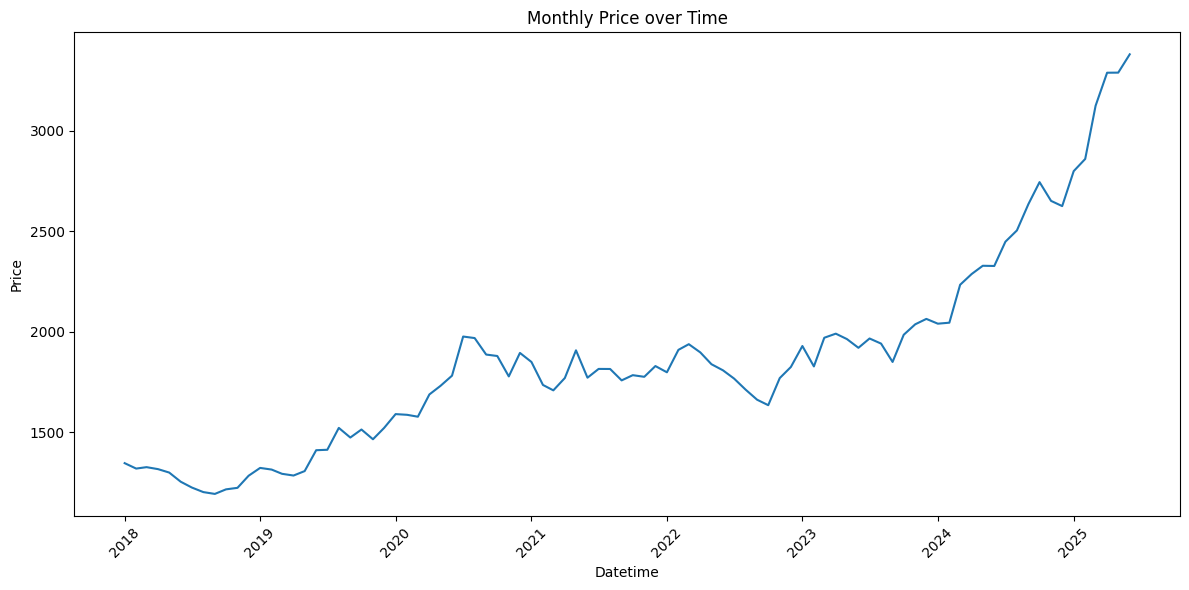

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly['datetime'], monthly['close'])
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.title('Monthly Price over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


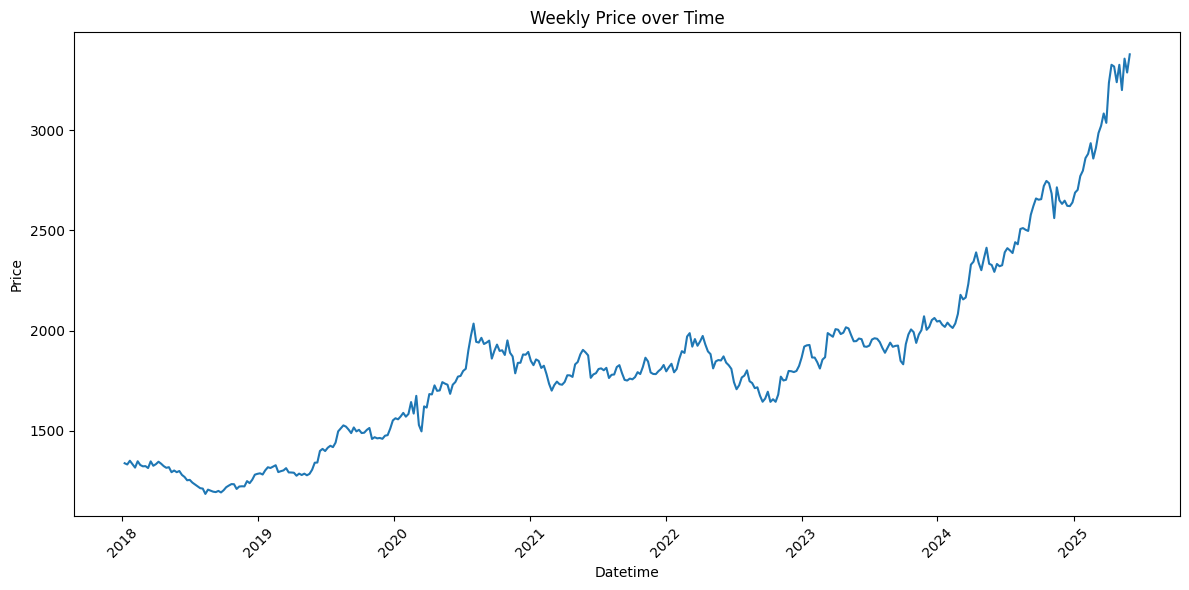

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(weekly['datetime'], weekly['close'])
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.title('Weekly Price over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

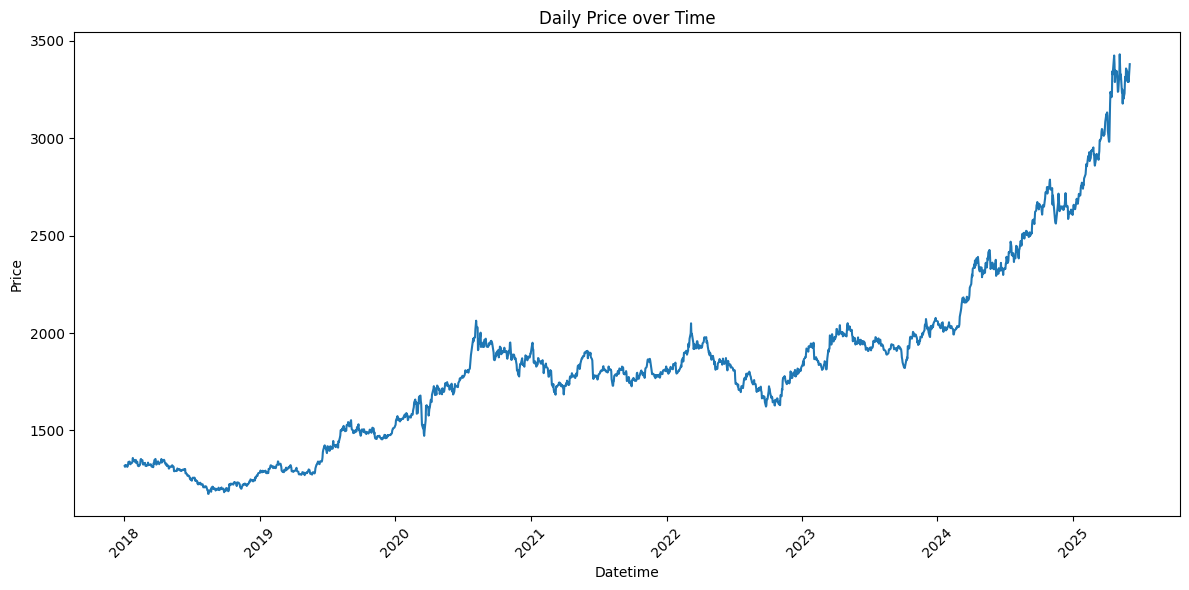

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(daily['datetime'], daily['close'])
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.title('Daily Price over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

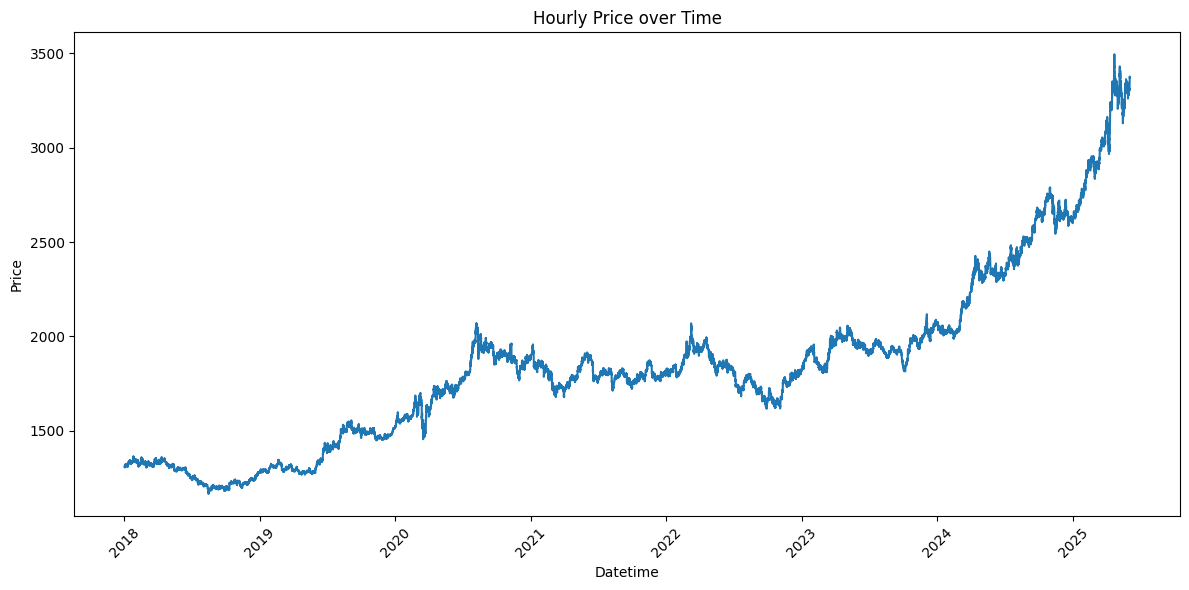

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(hourly['datetime'], hourly['close'])
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.title('Hourly Price over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
cpi = pd.read_csv('CPI.csv')
pce = pd.read_csv('PCE.csv')
ppi = pd.read_csv('PPI.csv')
gdp = pd.read_csv('GDP.csv')
interest_rates = pd.read_csv('Interest Rate.csv')
nfp = pd.read_csv('NFP.csv')


In [17]:
cpi.tail()

,Release Date,date,Time,month_tag,Actual,Forecast,Previous
84,"May 10, 2018 (Apr)",5/10/2018,15:30:00,Apr,0.025,0.025,0.024
85,"Apr 11, 2018 (Mar)",4/11/2018,15:30:00,Mar,0.024,0.024,0.022
86,"Mar 13, 2018 (Feb)",3/13/2018,15:30:00,Feb,0.022,0.022,0.021
87,"Feb 14, 2018 (Jan)",2/14/2018,16:30:00,Jan,0.021,0.019,0.021
88,"Jan 12, 2018 (Dec)",1/12/2018,16:30:00,Dec,0.021,0.021,0.022


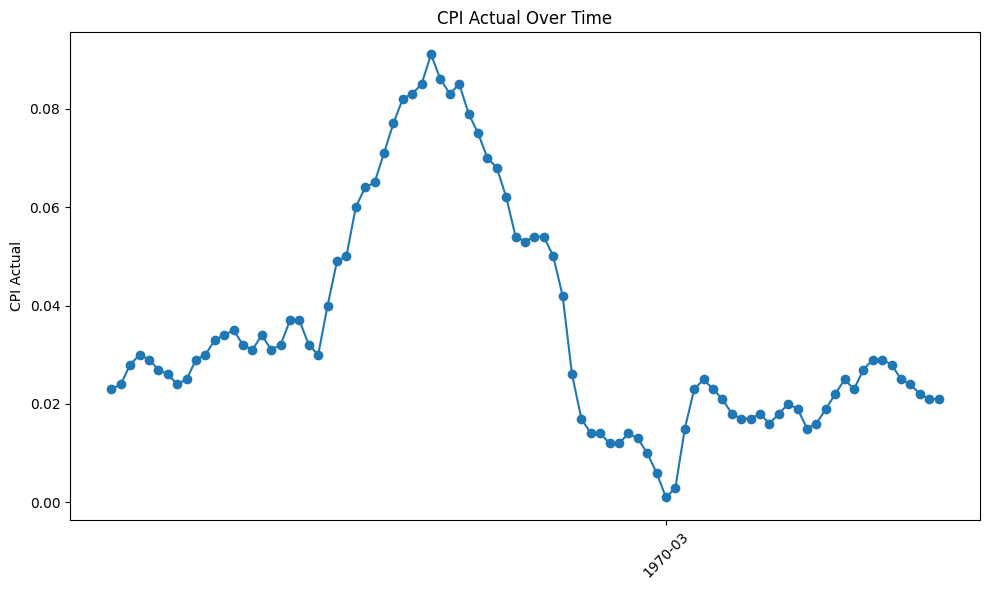

In [18]:
import matplotlib.dates as mdates

plt.figure(figsize=(10,6))
plt.plot(cpi['date'], cpi['Actual'], marker='o', linestyle='-')
plt.ylabel('CPI Actual')
plt.title('CPI Actual Over Time')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


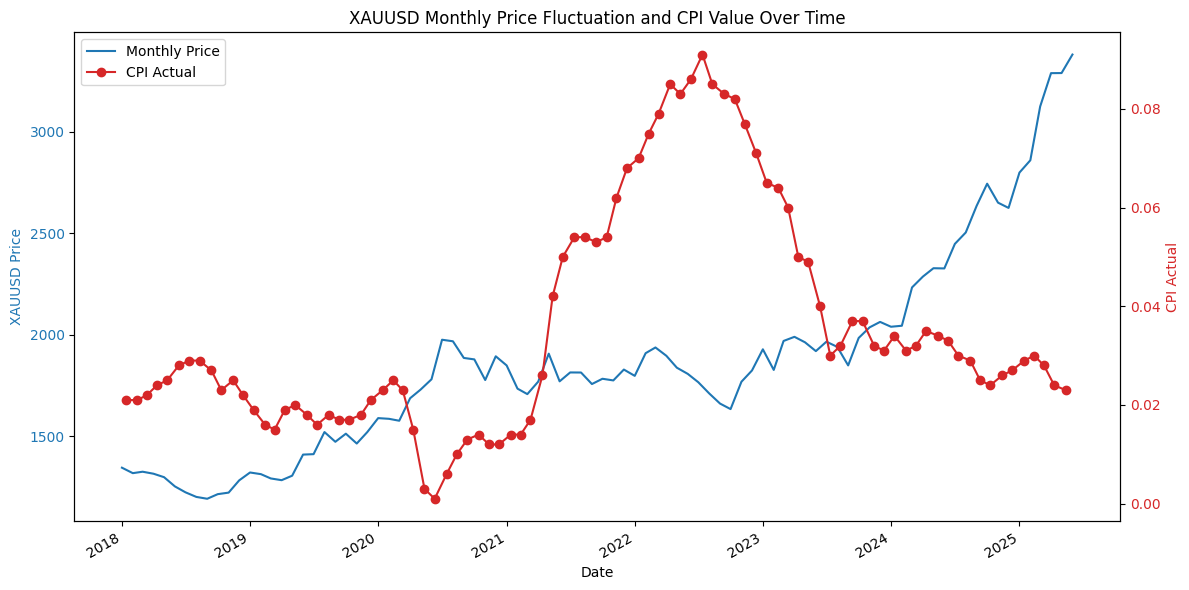

In [19]:
import matplotlib.pyplot as plt

# Clean cpi['date'] to be timezone naive datetime
cpi['date'] = pd.to_datetime(cpi['date'], errors='coerce').dt.tz_localize(None)

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(monthly['datetime'], monthly['close'], color='tab:blue', label='Monthly Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('XAUUSD Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(cpi['date'], cpi['Actual'], color='tab:red', marker='o', linestyle='-', label='CPI Actual')
ax2.set_ylabel('CPI Actual', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.autofmt_xdate()

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('XAUUSD Monthly Price Fluctuation and CPI Value Over Time')
plt.tight_layout()
plt.show()


In [20]:
interest_rates.head(10)

,date,Time,Actual,Forecast,Previous
0,12/10/2025,22:00:00,NaN,NaN,NaN
1,10/29/2025,21:00:00,NaN,NaN,NaN
2,9/17/2025,21:00:00,NaN,NaN,NaN
3,7/30/2025,21:00:00,NaN,NaN,NaN
4,6/18/2025,21:00:00,NaN,NaN,NaN
5,5/7/2025,21:00:00,0.0450,0.0450,0.0450
6,3/19/2025,21:00:00,0.0450,0.0450,0.0450
7,1/29/2025,22:00:00,0.0450,0.0450,0.0450
8,12/18/2024,22:00:00,0.0450,0.0450,0.0475
9,11/7/2024,22:00:00,0.0475,0.0475,0.0500


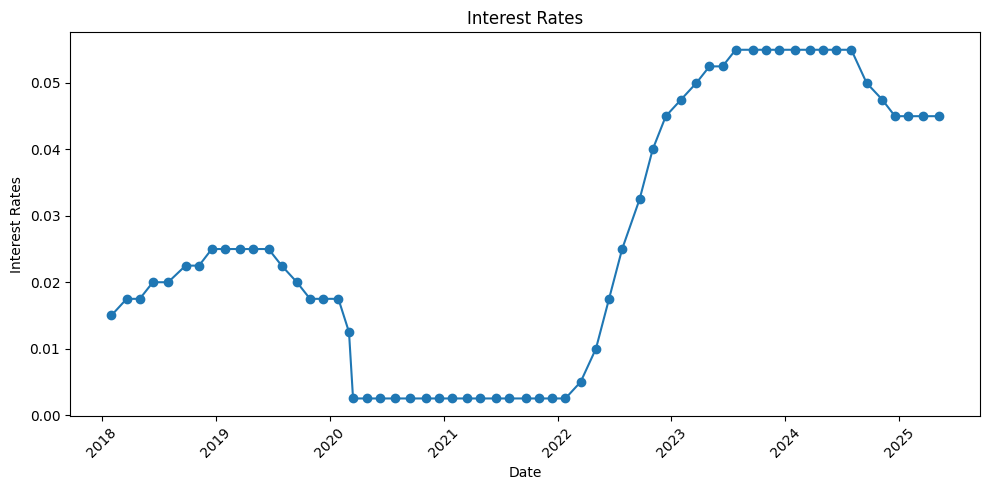

In [21]:
# Make sure 'date' is datetime
interest_rates['date'] = pd.to_datetime(interest_rates['date'])


plt.figure(figsize=(10, 5))
plt.plot(interest_rates['date'], interest_rates['Actual'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Interest Rates')
plt.title('Interest Rates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

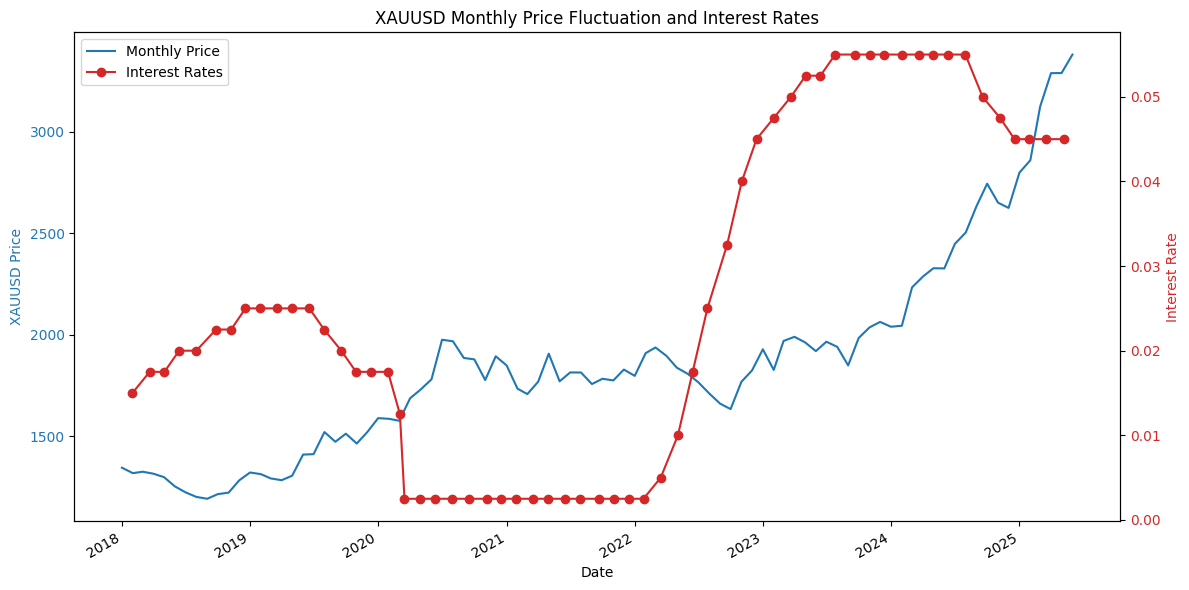

In [22]:
import matplotlib.pyplot as plt

# Clean interest_rates['date'] to be timezone naive datetime
interest_rates['date'] = pd.to_datetime(interest_rates['date'], errors='coerce').dt.tz_localize(None)

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(monthly['datetime'], monthly['close'], color='tab:blue', label='Monthly Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('XAUUSD Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()

ax2.plot(interest_rates['date'], interest_rates['Actual'], 
         color='tab:red', marker='o', linestyle='-', label='Interest Rates')
ax2.set_ylabel('Interest Rate', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.autofmt_xdate()

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('XAUUSD Monthly Price Fluctuation and Interest Rates')
plt.tight_layout()
plt.show()


In [23]:
pce.head(5)

,Release Date,date,Time,month_tag,Actual,Forecast,Previous
0,"May 30, 2025 (Apr)",5/30/2025,15:30:00,Apr,NaN,NaN,0.023
1,"Apr 30, 2025 (Mar)",4/30/2025,17:00:00,Mar,0.023,0.022,0.027
2,"Mar 28, 2025 (Feb)",3/28/2025,15:30:00,Feb,0.025,0.025,0.025
3,"Feb 28, 2025 (Jan)",2/28/2025,16:30:00,Jan,0.025,0.025,0.026
4,"Jan 31, 2025 (Dec)",1/31/2025,16:30:00,Dec,0.026,0.026,0.024


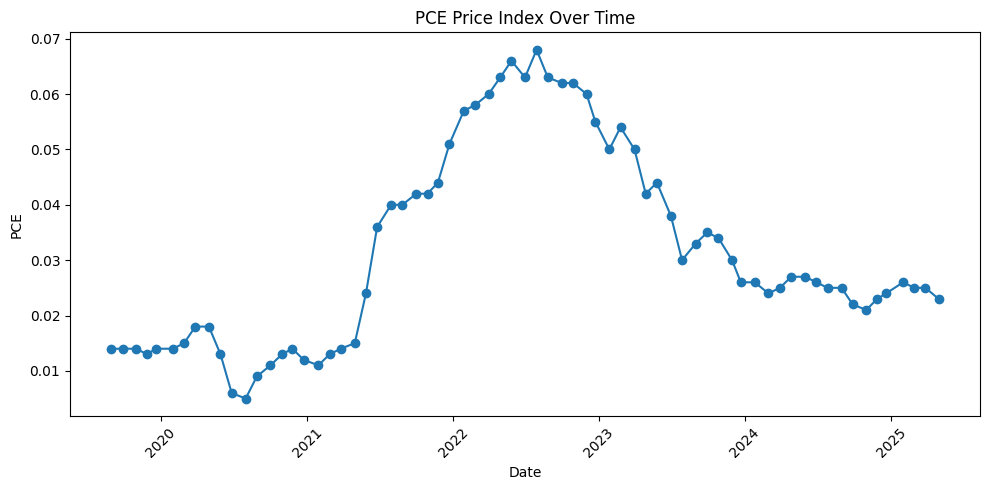

In [24]:
# Make sure 'date' is datetime
pce['date'] = pd.to_datetime(pce['date'])


plt.figure(figsize=(10, 5))
plt.plot(pce['date'], pce['Actual'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('PCE')
plt.title('PCE Price Index Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
nfp.head(5)

,Release Date,date,month_tag,Time,Actual,Forecast,Previous
0,"May 02, 2025 (Apr)",5/2/2025,Apr,15:30:00,177K,138K,185K
1,"Apr 04, 2025 (Mar)",4/4/2025,Mar,15:30:00,228K,137K,117K
2,"Mar 07, 2025 (Feb)",3/7/2025,Feb,16:30:00,151K,159K,125K
3,"Feb 07, 2025 (Jan)",2/7/2025,Jan,16:30:00,143K,169K,307K
4,"Jan 10, 2025 (Dec)",1/10/2025,Dec,16:30:00,256K,164K,212K


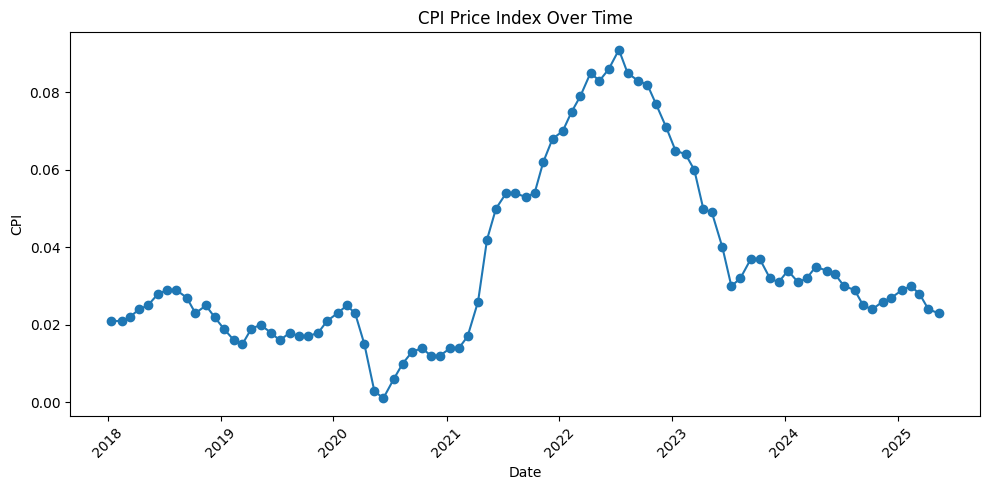

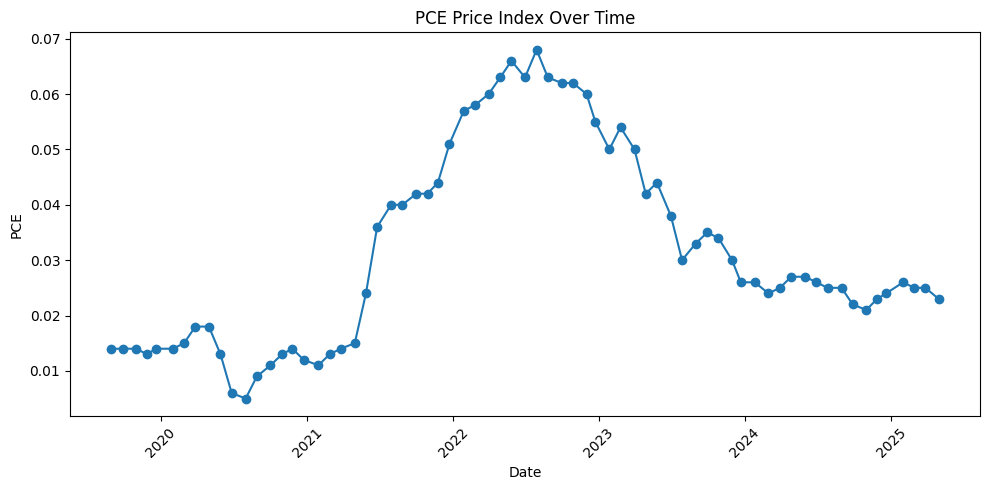

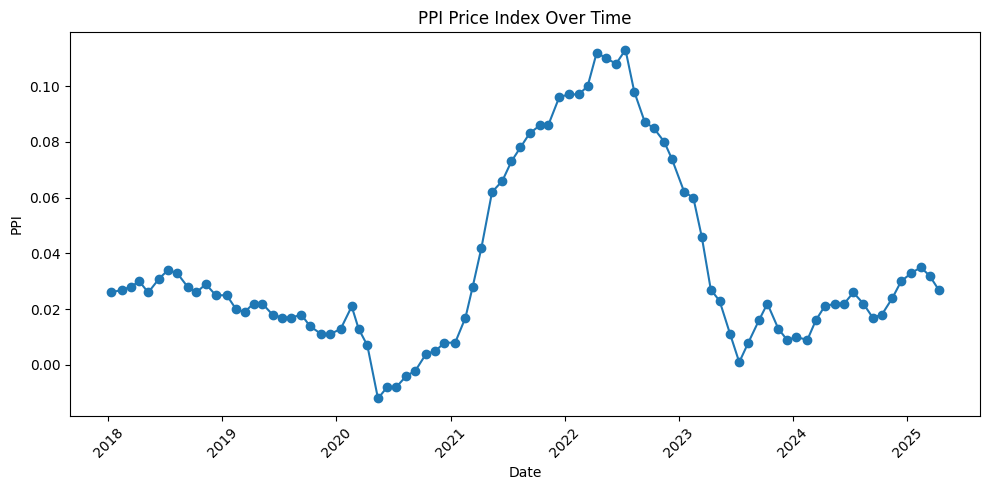

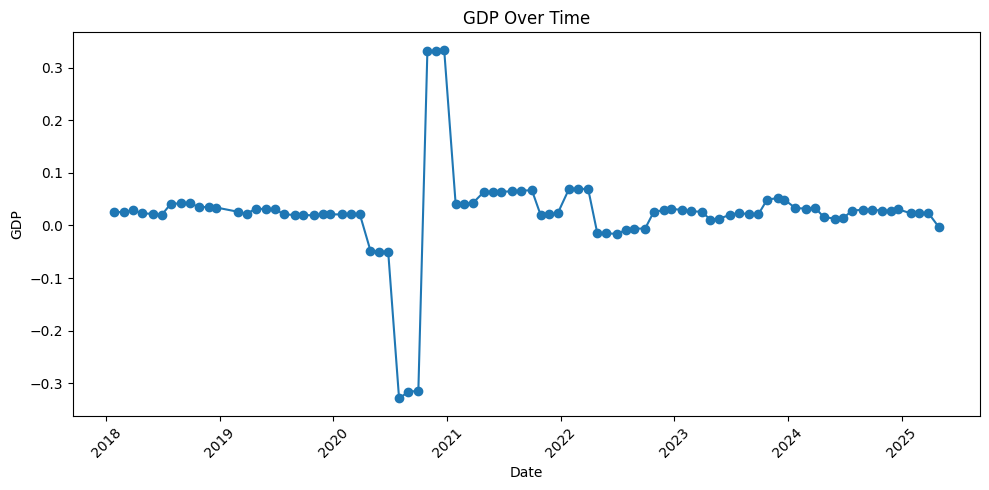

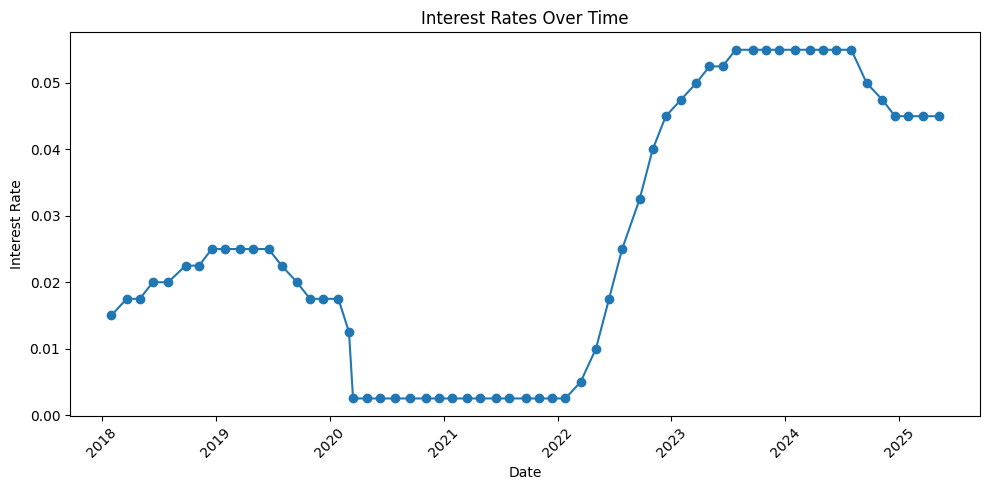

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your CSV files
cpi = pd.read_csv('CPI.csv')
pce = pd.read_csv('PCE.csv')
ppi = pd.read_csv('PPI.csv')
gdp = pd.read_csv('GDP.csv')
interest_rates = pd.read_csv('Interest Rate.csv')
nfp = pd.read_csv('NFP.csv')

# Convert 'date' columns to datetime for all datasets
for df in [cpi, pce, ppi, gdp, interest_rates, nfp]:
    df['date'] = pd.to_datetime(df['date'])

# List of tuples for easy looping: (DataFrame, value_column_name, plot_title, y_label)
datasets = [
    (cpi, 'Actual', 'CPI Price Index Over Time', 'CPI'),
    (pce, 'Actual', 'PCE Price Index Over Time', 'PCE'),
    (ppi, 'Actual', 'PPI Price Index Over Time', 'PPI'),
    (gdp, 'Actual', 'GDP Over Time', 'GDP'),
    (interest_rates, 'Actual', 'Interest Rates Over Time', 'Interest Rate'),
]

# Plot each dataset separately
for df, value_col, title, ylabel in datasets:
    plt.figure(figsize=(10, 5))
    plt.plot(df['date'], df[value_col], marker='o', linestyle='-')
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    


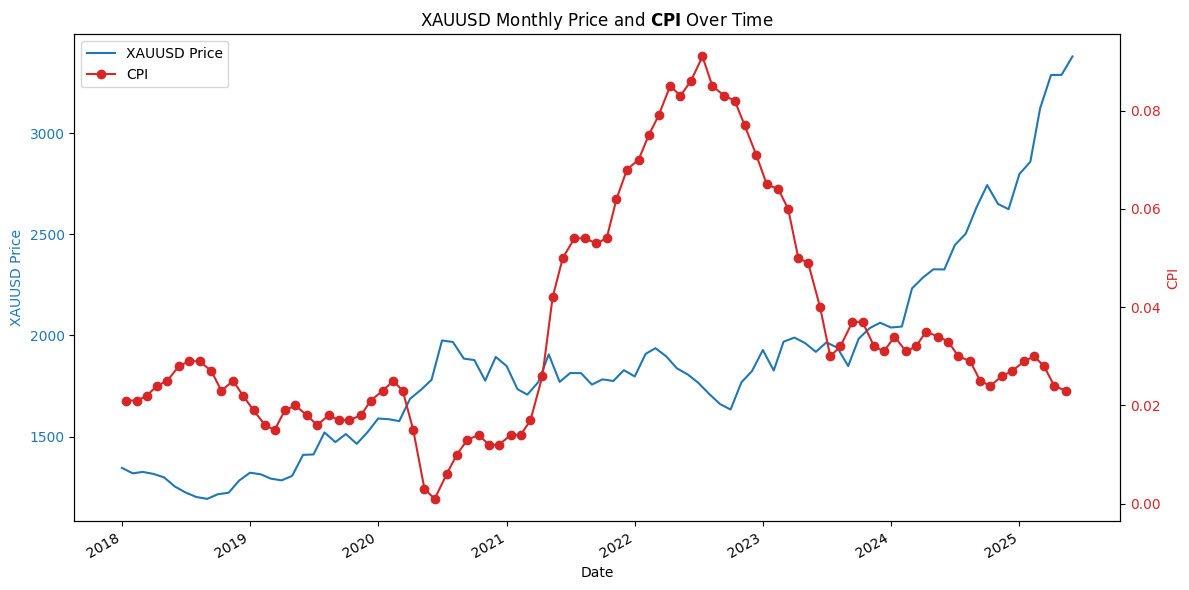

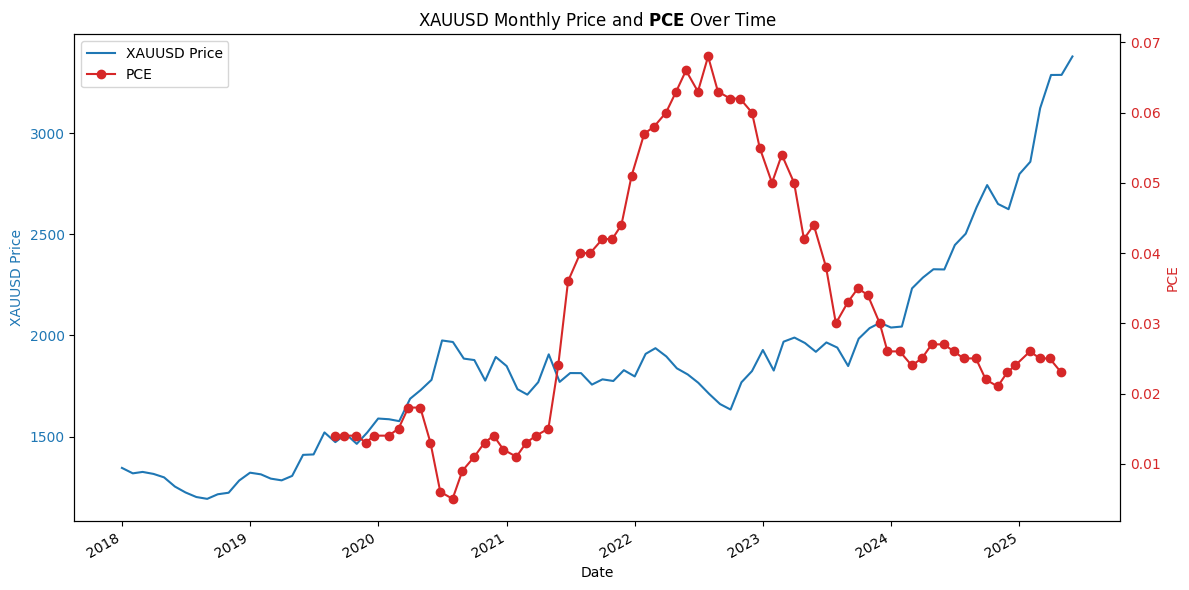

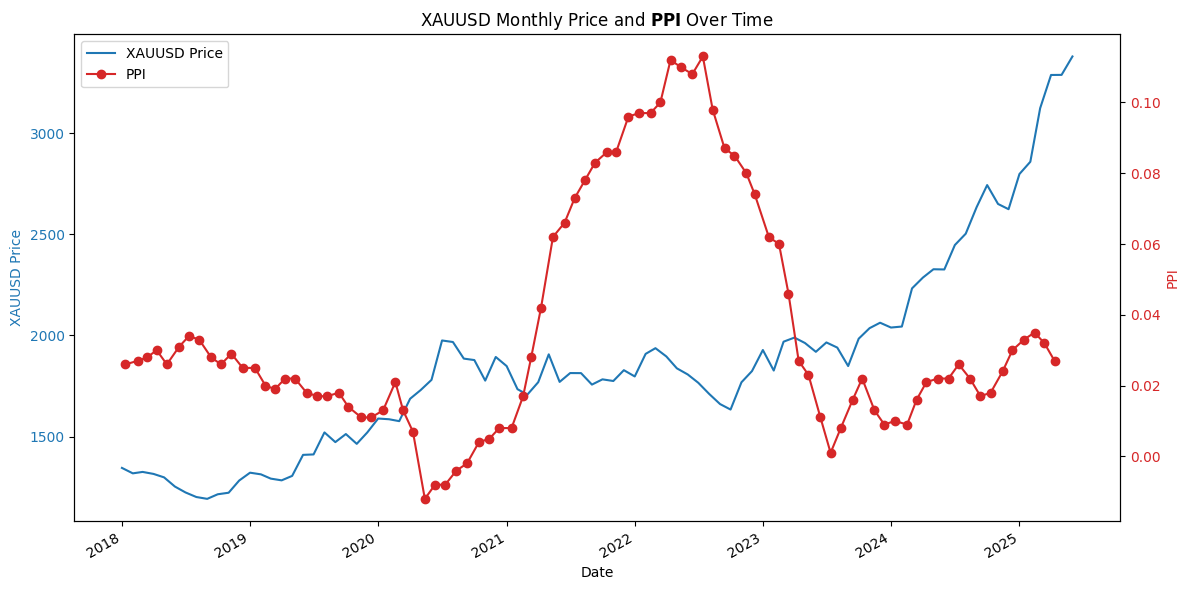

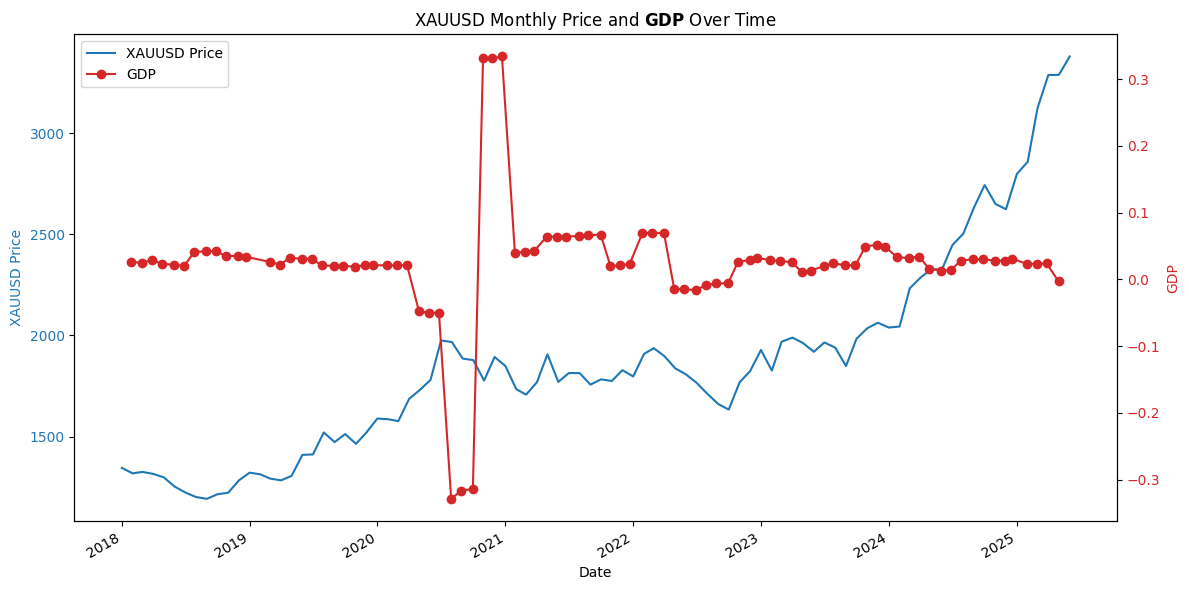

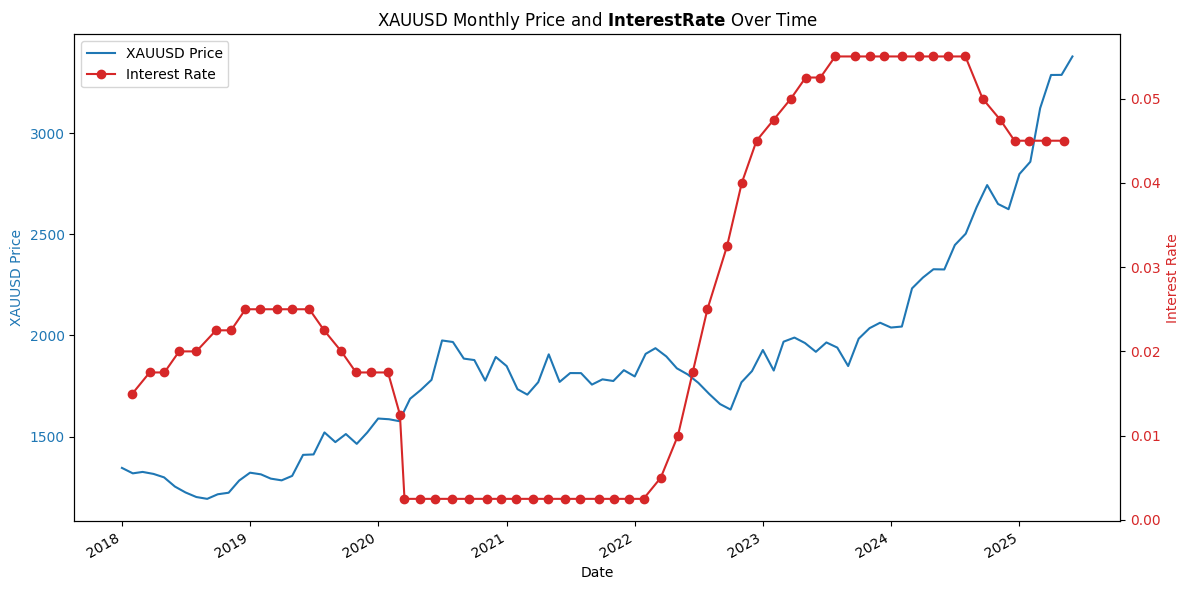

In [27]:
import matplotlib.pyplot as plt

# Make sure your 'date' columns are timezone naive (if needed)
for df in [cpi, pce, ppi, gdp, interest_rates, nfp]:
    df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.tz_localize(None)

# Also make sure monthly datetime is timezone naive
monthly['datetime'] = pd.to_datetime(monthly['datetime'], errors='coerce').dt.tz_localize(None)

datasets = [
    (cpi, 'Actual', 'CPI'),
    (pce, 'Actual', 'PCE'),
    (ppi, 'Actual', 'PPI'),
    (gdp, 'Actual', 'GDP'),
    (interest_rates, 'Actual', 'Interest Rate'),
    # (nfp, 'Actual', 'NFP'),
]

for df, value_col, ylabel in datasets:
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot XAUUSD price
    ax1.plot(monthly['datetime'], monthly['close'], color='tab:blue', label='XAUUSD Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('XAUUSD Price', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Plot the economic indicator on a second y-axis
    ax2 = ax1.twinx()
    ax2.plot(df['date'], df[value_col], color='tab:red', marker='o', linestyle='-', label=ylabel)
    ax2.set_ylabel(ylabel, color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    fig.autofmt_xdate()

    # Combine legends from both axes
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

    plt.title(r'XAUUSD Monthly Price and $\bf{' + ylabel + '}$ Over Time')
    plt.tight_layout()
    
    # Save the plot as a PNG file
    filename = f"xauusd_and_{ylabel.lower().replace(' ', '_')}.png"
    plt.savefig(filename)
    
    plt.show()


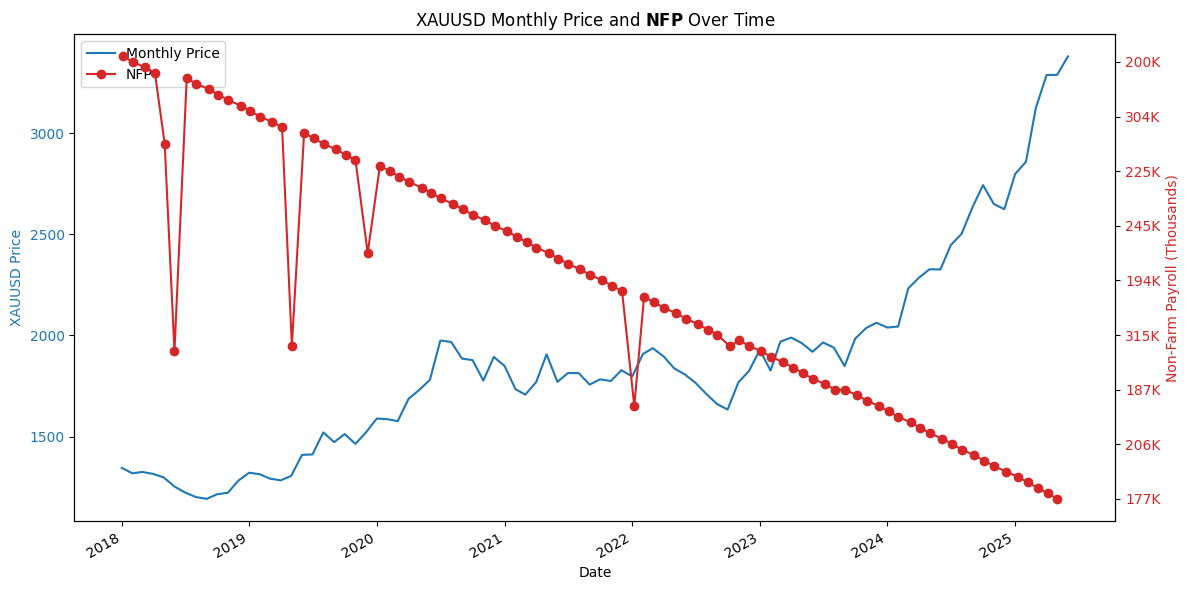

In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Make sure datetime columns are datetime type and timezone naive
monthly['datetime'] = pd.to_datetime(monthly['datetime'], errors='coerce').dt.tz_localize(None)
nfp['date'] = pd.to_datetime(nfp['date'], errors='coerce').dt.tz_localize(None)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Monthly Price on left y-axis
ax1.plot(monthly['datetime'], monthly['close'], color='tab:blue', label='Monthly Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('XAUUSD Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for NFP
ax2 = ax1.twinx()
ax2.plot(nfp['date'], nfp['Actual'], color='tab:red', marker='o', linestyle='-', label='NFP')
ax2.set_ylabel('Non-Farm Payroll (Thousands)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Limit y-axis ticks on NFP axis
ax2.yaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

fig.autofmt_xdate()

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')
plt.title(r'XAUUSD Monthly Price and $\mathbf{' + 'NFP' + r'}$ Over Time')

plt.tight_layout()
# Save the plot as a PNG file
filename = f"xauusd_and_{ylabel.lower().replace(' ', '_')}.png"
plt.savefig(filename)
plt.show()


In [29]:
unemployment_rate = pd.read_csv('Unemployment Rate.csv')

In [30]:
unemployment_rate.head()

,Release Date,date,Time,Actual,Forecast,Previous
0,"Jun 06, 2025 (May)",6/6/2025,15:30,NaN,0.04,0.04
1,"May 02, 2025 (Apr)",5/2/2025,15:30,0.04,0.04,0.04
2,"Apr 04, 2025 (Mar)",4/4/2025,15:30,0.04,0.04,0.04
3,"Mar 07, 2025 (Feb)",3/7/2025,16:30,0.04,0.04,0.04
4,"Feb 07, 2025 (Jan)",2/7/2025,16:30,0.04,0.04,0.04


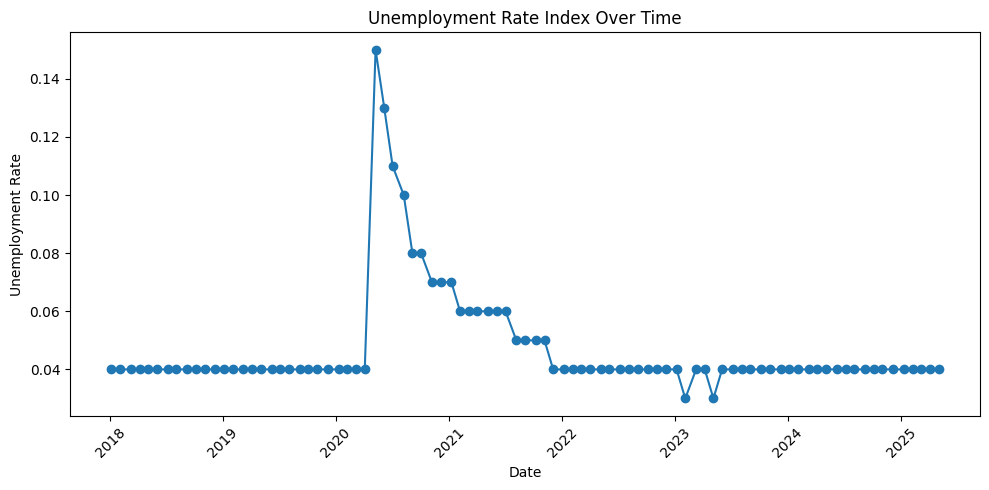

In [31]:
# Make sure 'date' is datetime
unemployment_rate['date'] = pd.to_datetime(unemployment_rate['date'])


plt.figure(figsize=(10, 5))
plt.plot(unemployment_rate['date'], unemployment_rate['Actual'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Index Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

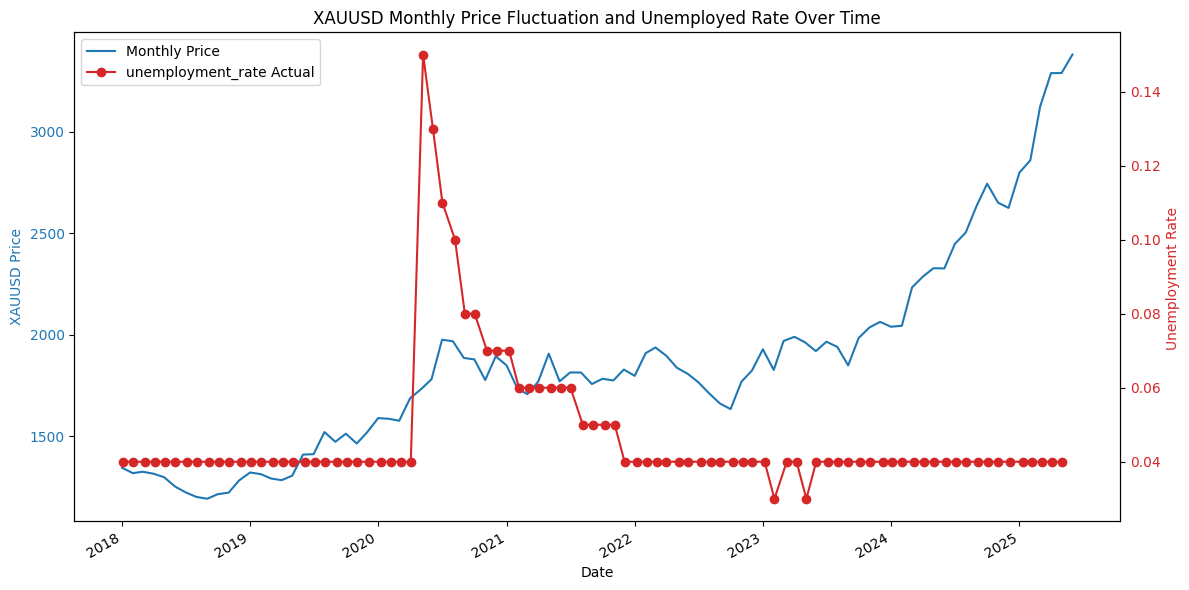

In [32]:
import matplotlib.pyplot as plt

# Clean unemployment_rate['date'] to be timezone naive datetime
unemployment_rate['date'] = pd.to_datetime(unemployment_rate['date'], errors='coerce').dt.tz_localize(None)

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(monthly['datetime'], monthly['close'], color='tab:blue', label='Monthly Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('XAUUSD Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(unemployment_rate['date'], unemployment_rate['Actual'], color='tab:red', marker='o', linestyle='-', label='unemployment_rate Actual')
ax2.set_ylabel('Unemployment Rate ', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.autofmt_xdate()

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('XAUUSD Monthly Price Fluctuation and Unemployed Rate Over Time')
plt.tight_layout()
plt.show()


In [35]:
finalmonthlydata = pd.read_csv('final monthly data.csv')

In [38]:
finalmonthlydata.columns


Index(['index', 'time', 'open', 'high', 'low', 'close', 'avgPrice', 'gradient',
       'signal_label', 'signal_with_time', 'CPI_Actual', 'CPI_Forecast',
       'CPI_Previous', 'GDP_Actual', 'GDP_Forecast', 'GDP_Previous',
       'Interest_Rate_Actual', 'Interest_Rate_Forecast',
       'Interest_Rate_Previous', 'NFP_Actual', 'NFP_Forecast', 'NFP_Previous',
       'PCE_Actual', 'PCE_Forecast', 'PCE_Previous', 'PPI_Actual',
       'PPI_Forecast', 'PPI_Previous'],
      dtype='object')

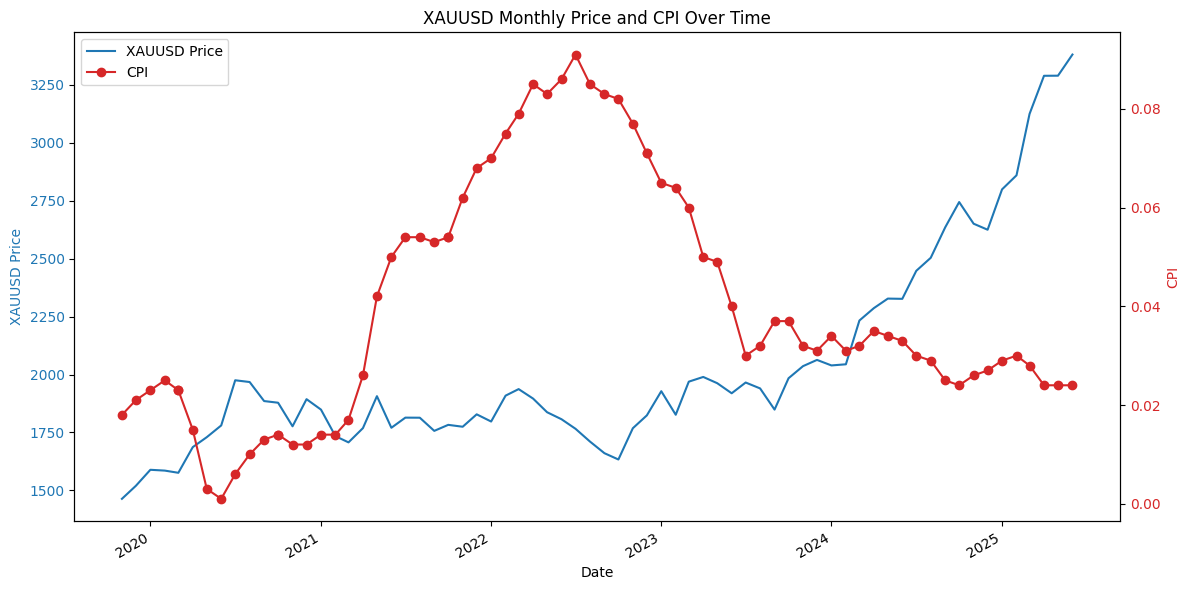

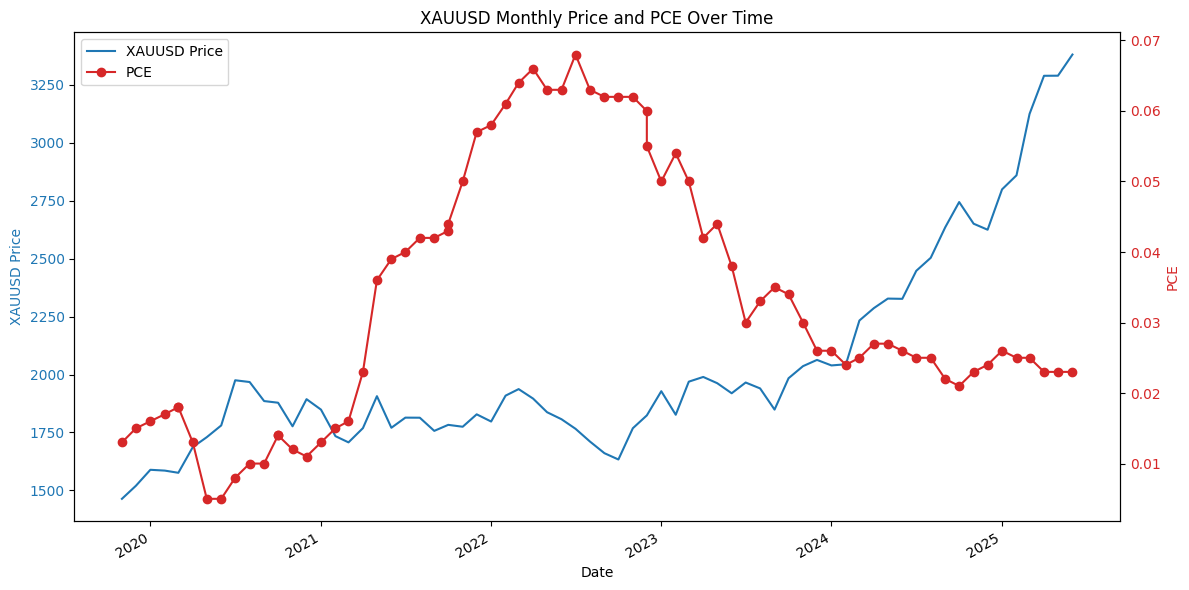

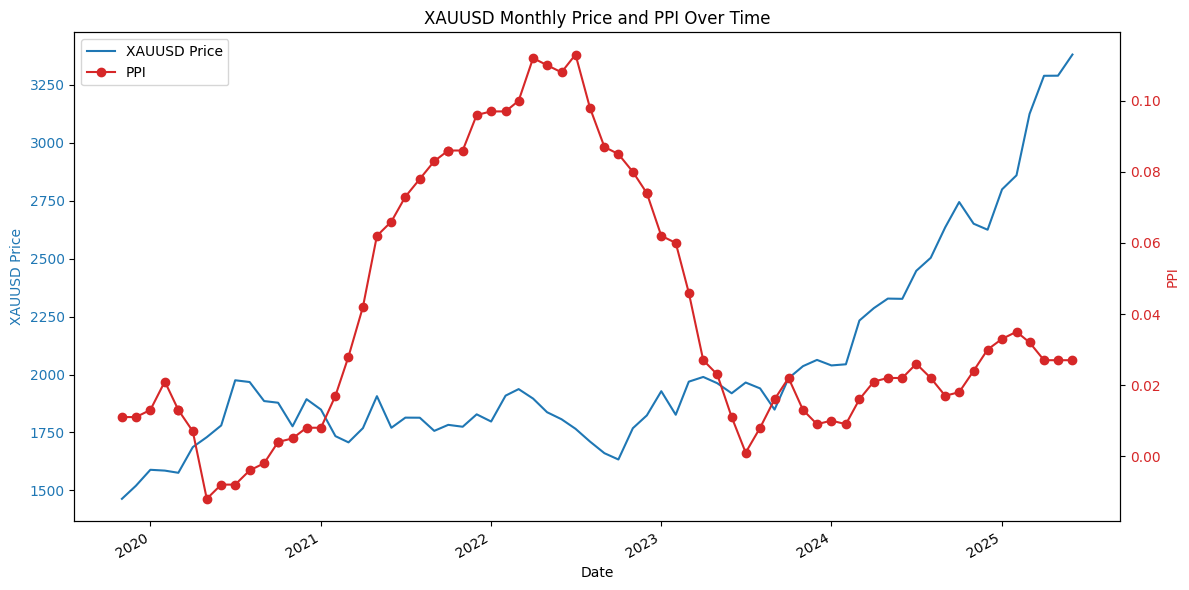

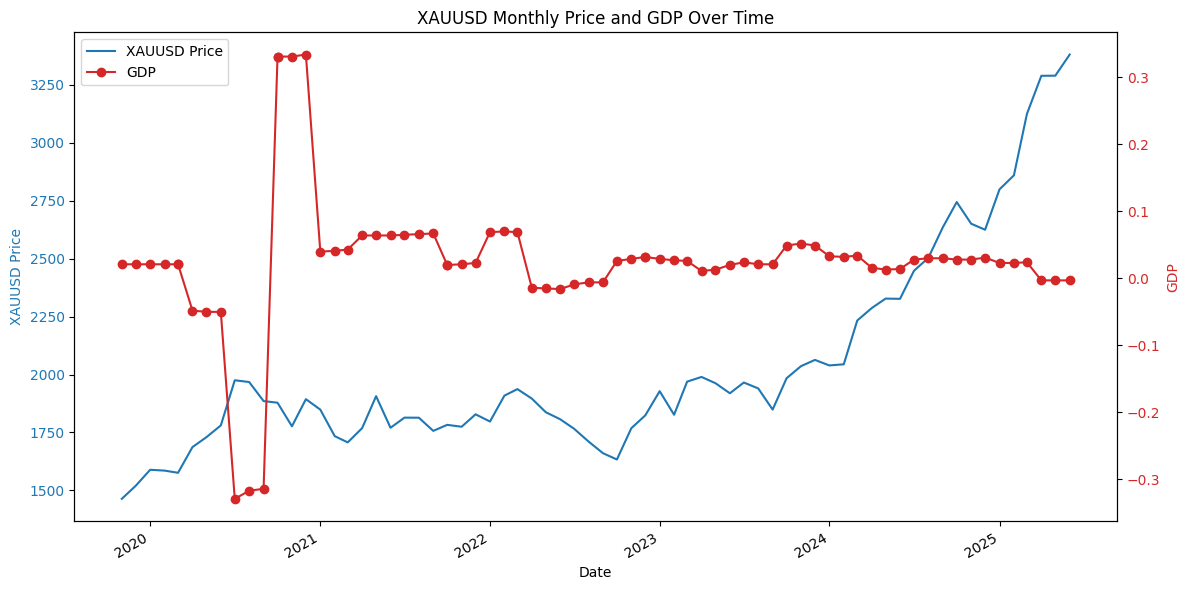

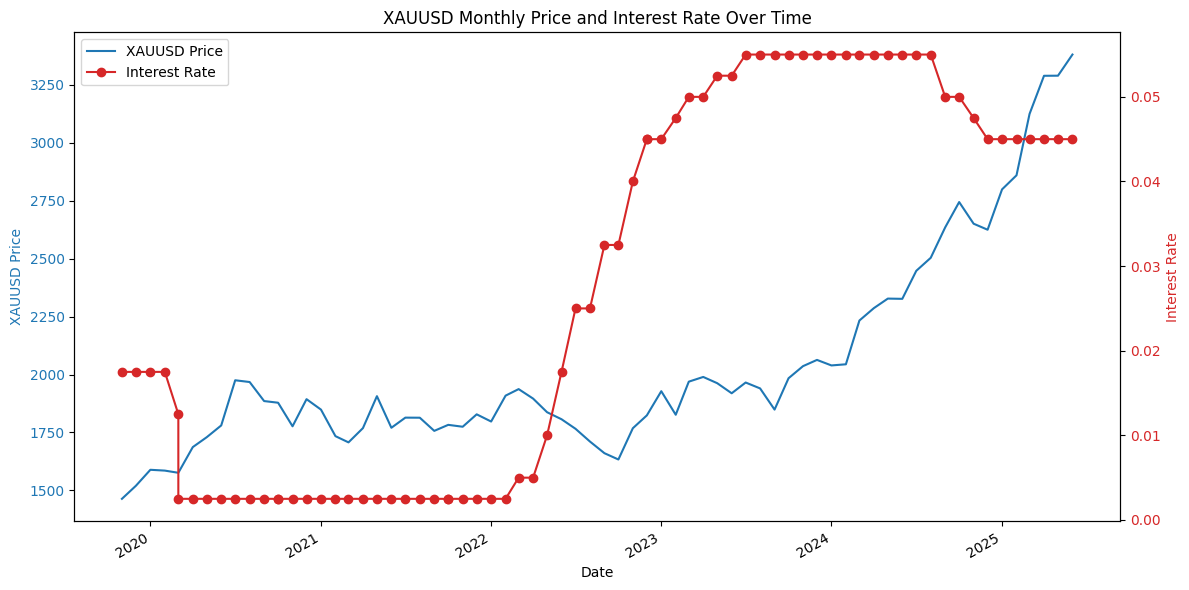

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Make sure your 'time' column is timezone naive (if needed)
finalmonthlydata['time'] = pd.to_datetime(finalmonthlydata['time'], errors='coerce').dt.tz_localize(None)

# Dataset with column names from finalmonthlydata
datasets = [
    (finalmonthlydata, 'CPI_Actual', 'CPI'),
    (finalmonthlydata, 'PCE_Actual', 'PCE'),
    (finalmonthlydata, 'PPI_Actual', 'PPI'),
    (finalmonthlydata, 'GDP_Actual', 'GDP'),
    (finalmonthlydata, 'Interest_Rate_Actual', 'Interest Rate'),
    # (finalmonthlydata, 'NFP_Actual', 'NFP'),  # Uncomment if needed
]

for df, value_col, ylabel in datasets:
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot XAUUSD price
    ax1.plot(finalmonthlydata['time'], finalmonthlydata['close'], color='tab:blue', label='XAUUSD Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('XAUUSD Price', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Plot the economic indicator on a second y-axis
    ax2 = ax1.twinx()
    ax2.plot(df['time'], df[value_col], color='tab:red', marker='o', linestyle='-', label=ylabel)
    ax2.set_ylabel(ylabel, color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    fig.autofmt_xdate()

    # Combine legends from both axes
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

    plt.title(f'XAUUSD Monthly Price and {ylabel} Over Time')
    plt.tight_layout()

    # Save the plot as a PNG file
    filename = f"xauusd_and_{ylabel.lower().replace(' ', '_')}.png"
    plt.savefig(filename)

    plt.show()


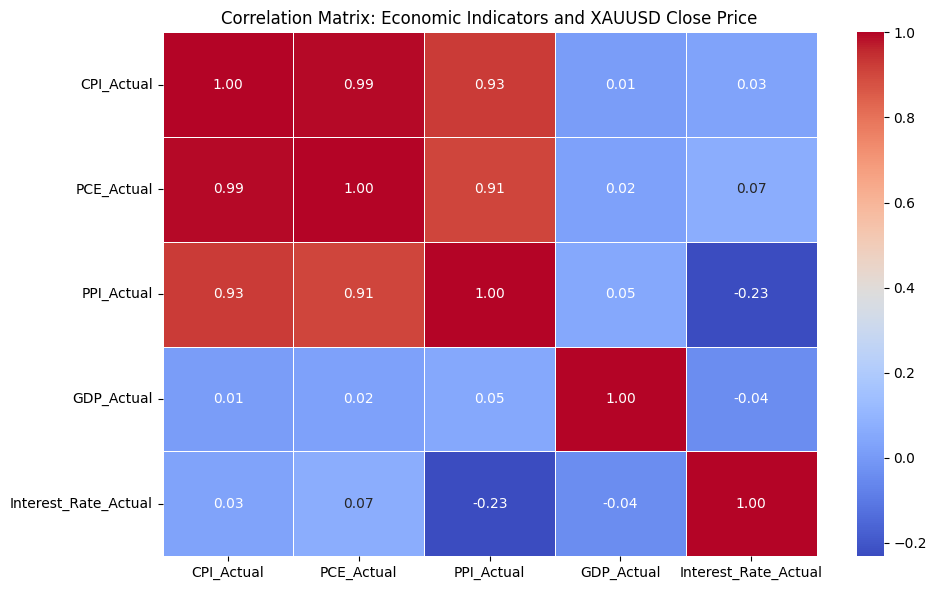

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Ensure 'time' column is timezone naive (if needed)
finalmonthlydata['time'] = pd.to_datetime(finalmonthlydata['time'], errors='coerce').dt.tz_localize(None)

# Select the columns you're interested in (economic indicators and close price)
columns_of_interest = [
    'CPI_Actual', 'PCE_Actual', 'PPI_Actual', 'GDP_Actual', 'Interest_Rate_Actual'
]

# Create a new DataFrame with just these columns
subset_df = finalmonthlydata[columns_of_interest]

# Compute the correlation matrix
correlation_matrix = subset_df.corr()

# Plot the correlation matrix using seaborn's heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Economic Indicators and XAUUSD Close Price')
plt.tight_layout()
plt.show()
